# **Exploratory Data Analysis**

### Librerías

In [2]:
"""Librerías que pueden ser necesarias"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"

### Carga de datos

In [88]:
df_original = pd.read_csv("../Data/df_original.csv")
df_original.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


## 1. Descripción general de los datos

Campaña de marketing de un banco portugués para predecir si un cliente se subscribirá a un plazo fijo.

Promoción de plazos fijos por llamada telefónica.

- Filas: 11163 clientes
- Columnas:
    - **'id', 'age', 'job', 'marital', 'education'**: id, edad, tipo de empleo, estado civil, nivel educativo → **Características personales del cliente**
    - **'default', 'balance', 'housing', 'loan'**: impagos, saldo medio anual, hipoteca, préstamos → **Características de las finanzas del cliente**
    - **'contact', 'day', 'month', 'duration', 'campaign'**: tipo de llamada, día, mes, duración de la llamada y número de contactos→ **Características del contacto realizado al cliente en la campaña actual**
    - **'pdays', 'previous', 'poutcome'**: días desde el último contacto, número de contactos en campañas anteriores, resultado de campaña anterior → **Características campañas anteriores**
    - **'deposit'**: resultado de la campaña actual → **Objetivo**

Información extraída:
- **Age**: 18 - 95 años. 10 nulos
- **Balance**: -6847 - 81204 €
- **Day**: 1 - 31 (días del mes)
- **Duration**: 2 - 3881 s de llamada
- **Campaign**: entre 1 y 63 contactos por cliente en esta campaña
- **Pdays**: -1 sin contacto previo. Entre -1 - 854 días del último contacto en esta campaña
- **Previous**: entre 0 - 68 contactos en campañas anteriores

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         11163 non-null  int64  
 1   age        11153 non-null  float64
 2   job        11163 non-null  object 
 3   marital    11158 non-null  object 
 4   education  11156 non-null  object 
 5   default    11163 non-null  object 
 6   balance    11163 non-null  int64  
 7   housing    11163 non-null  object 
 8   loan       11163 non-null  object 
 9   contact    11163 non-null  object 
 10  day        11163 non-null  int64  
 11  month      11163 non-null  object 
 12  duration   11163 non-null  int64  
 13  campaign   11163 non-null  int64  
 14  pdays      11163 non-null  int64  
 15  previous   11163 non-null  int64  
 16  poutcome   11163 non-null  object 
 17  deposit    11163 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 1.5+ MB


1 float → cambiar age a int

7 int → id y day son en realidad texto, solo 5 numéricas

10 object → 9 variables categóricas + deposit

In [5]:
df_original.shape       # (filas, columnas)

"""11163 clientes y 18 variables analizadas"""

(11163, 18)

In [6]:
df_original.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,11163.000000,11153.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000
mean,5582.000000,41.236977,1528.611484,15.657081,372.053839,2.508286,51.325719,0.832482
std,3222.624862,11.915588,3225.278053,8.420967,347.170757,2.721993,108.754538,2.291918
min,1.000000,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,2791.500000,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,5582.000000,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,8372.500000,49.000000,1708.500000,22.000000,496.000000,3.000000,20.500000,1.000000
max,11163.000000,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df_original.isnull().sum()

id            0
age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

## 2. Análisis univariado

### Características personales

##### Age

<Axes: >

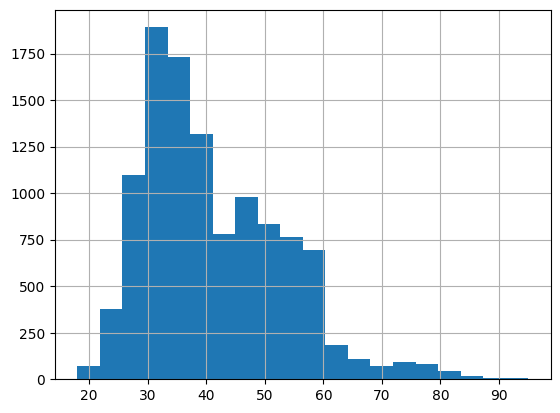

In [8]:
df_original['age'].hist(bins=20)

count    11153.000000
mean        41.236977
std         11.915588
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64


<Axes: >

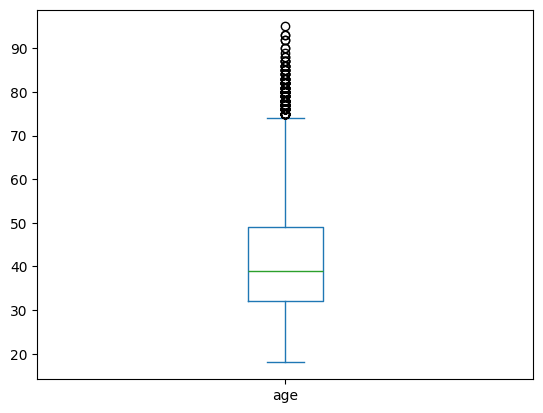

In [9]:
print(df_original['age'].describe())
df_original['age'].plot.box()

##### Job

job
management       2566
blue-collar      1944
technician       1823
admin.           1335
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


<Axes: xlabel='job'>

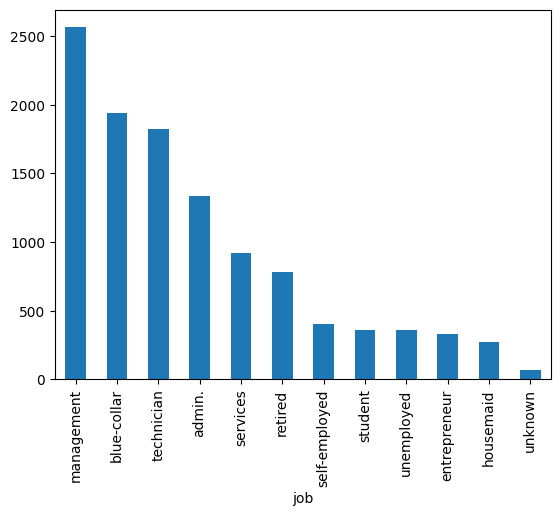

In [38]:
print(df_original['job'].value_counts())
df_original['job'].value_counts().plot(kind='bar', rot=90)

##### Marital

marital
married     6350
single      3517
divorced    1291
Name: count, dtype: int64


<Axes: xlabel='marital'>

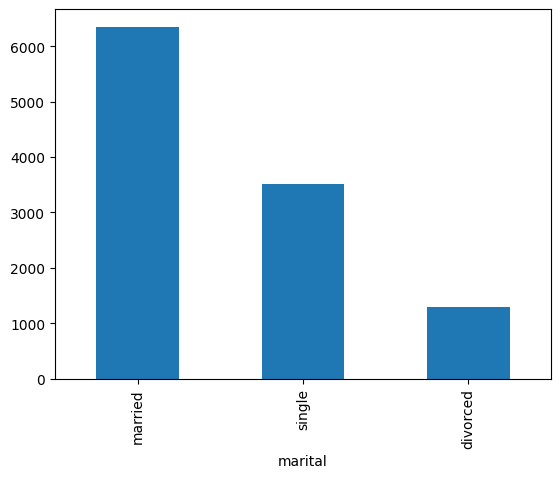

In [39]:
print(df_original['marital'].value_counts())
df_original['marital'].value_counts().plot(kind='bar', rot=90)

##### Education

education
secondary    5475
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64


<Axes: xlabel='education'>

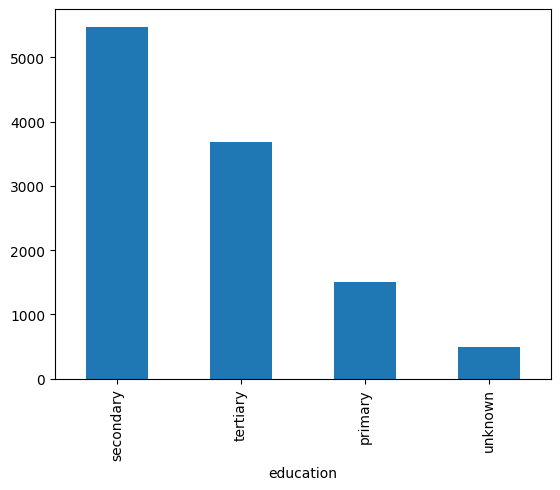

In [40]:
print(df_original['education'].value_counts())
df_original['education'].value_counts().plot(kind='bar', rot=90)

### Características de finanzas

##### Default

default
no     10995
yes      168
Name: count, dtype: int64


<Axes: xlabel='default'>

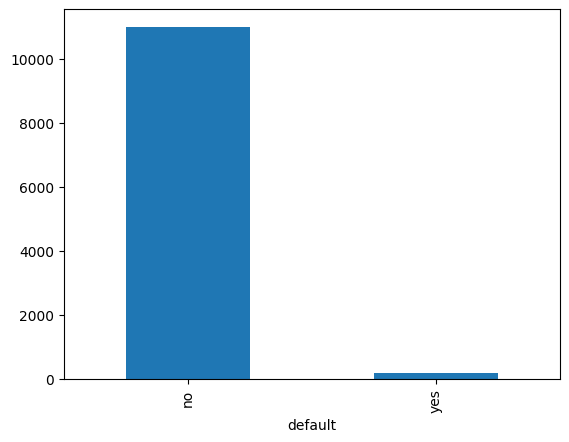

In [41]:
print(df_original['default'].value_counts())
df_original['default'].value_counts().plot(kind='bar', rot=90)

##### Balance

<Axes: >

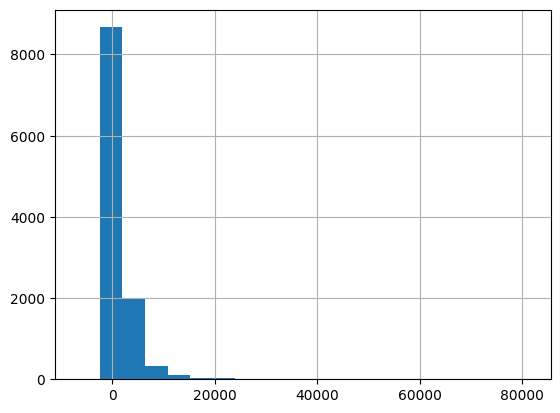

In [87]:
df_original['balance'].hist(bins=20)

count    11163.000000
mean      1528.611484
std       3225.278053
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.500000
max      81204.000000
Name: balance, dtype: float64


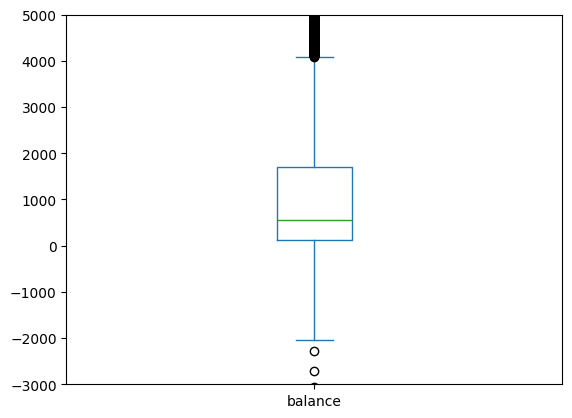

In [10]:
print(df_original['balance'].describe())
df_original['balance'].plot.box()
plt.ylim(-3000, 5000)
plt.show()

##### Housing

housing
no     5881
yes    5282
Name: count, dtype: int64


<Axes: xlabel='housing'>

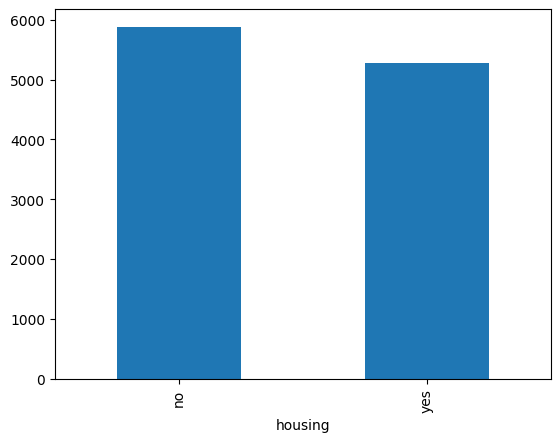

In [42]:
print(df_original['housing'].value_counts())
df_original['housing'].value_counts().plot(kind='bar', rot=90)

##### Loan

loan
no     9703
yes    1460
Name: count, dtype: int64


<Axes: xlabel='loan'>

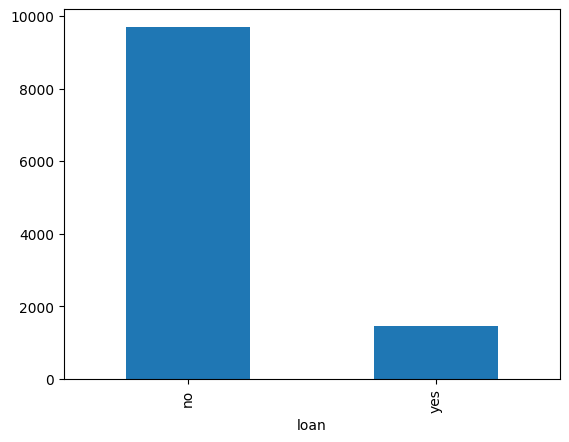

In [43]:
print(df_original['loan'].value_counts())
df_original['loan'].value_counts().plot(kind='bar', rot=90)

### Características contactos en campaña actual

##### Contact

contact
cellular     8042
unknown      2347
telephone     774
Name: count, dtype: int64


<Axes: xlabel='contact'>

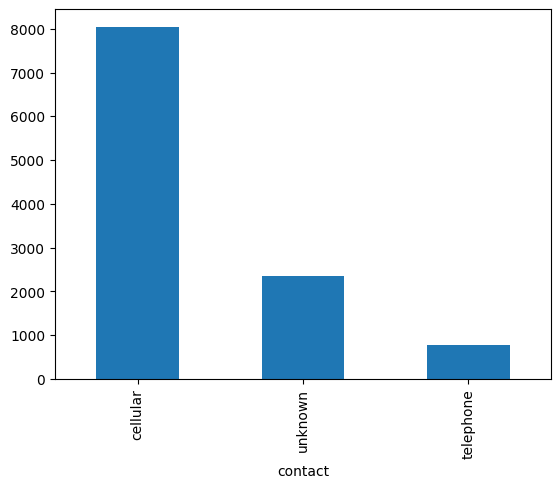

In [44]:
print(df_original['contact'].value_counts())
df_original['contact'].value_counts().plot(kind='bar', rot=90)

##### Day

day
1     122
2     334
3     306
4     402
5     478
6     447
7     382
8     419
9     364
10    163
11    373
12    445
13    453
14    463
15    466
16    369
17    411
18    548
19    384
20    570
21    452
22    269
23    245
24    122
25    224
26    252
27    284
28    410
29    388
30    478
31    140
Name: count, dtype: int64


<Axes: xlabel='day'>

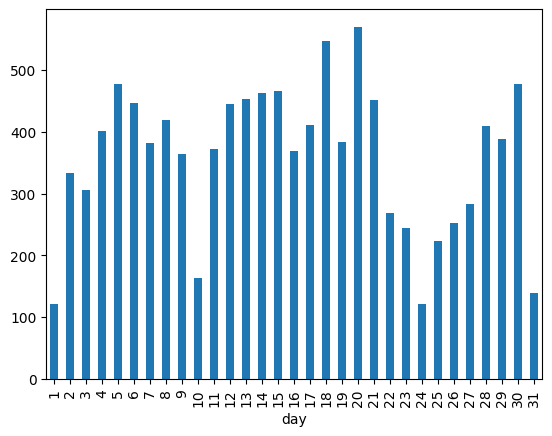

In [46]:
print(df_original['day'].value_counts().sort_index())
df_original['day'].value_counts().sort_index().plot(kind='bar', rot=90)

##### Month

month
jan     344
feb     776
mar     276
apr     923
may    2825
jun    1222
jul    1514
aug    1519
sep     319
oct     392
nov     943
dec     110
Name: count, dtype: int64


<Axes: xlabel='month'>

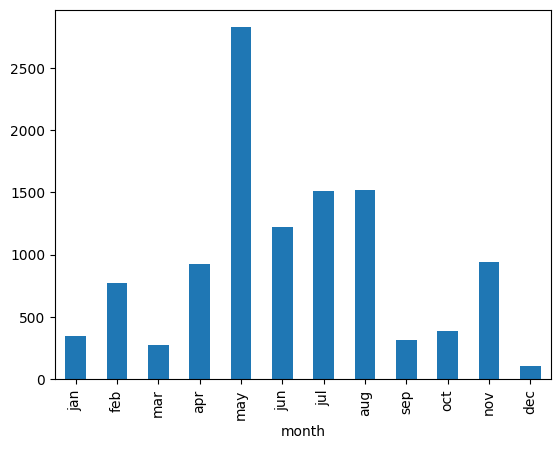

In [50]:
orden_meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
print(df_original['month'].value_counts().reindex(orden_meses))
df_original['month'].value_counts().reindex(orden_meses).plot(kind='bar', rot=90)

##### Duration

<Axes: >

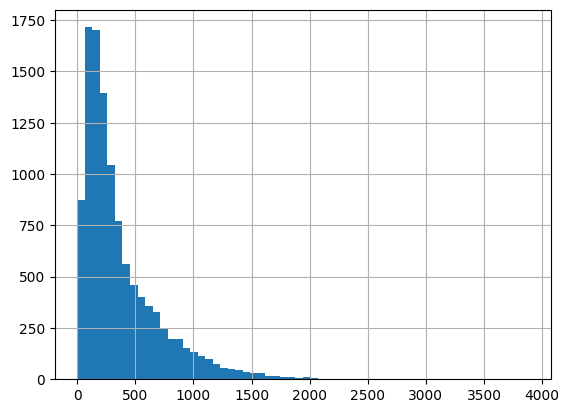

In [55]:
df_original['duration'].hist(bins=60)

count    11163.000000
mean       372.053839
std        347.170757
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64


<Axes: >

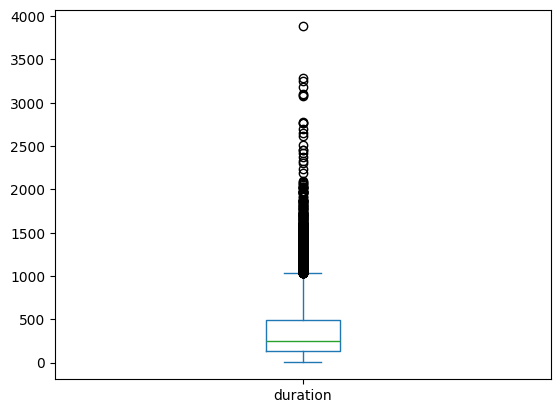

In [57]:
print(df_original['duration'].describe())
df_original['duration'].plot.box()

##### Campaign

<Axes: >

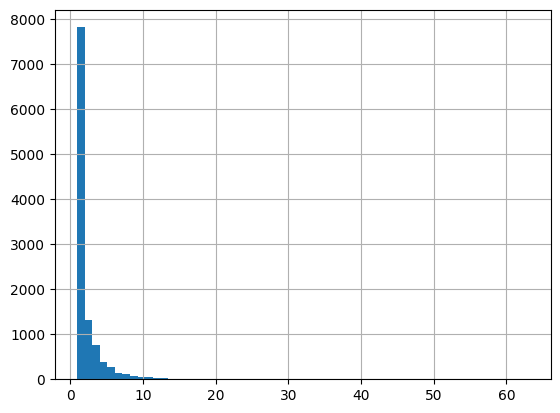

In [19]:
df_original['campaign'].hist(bins=60)

count    11163.000000
mean         2.508286
std          2.721993
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


<Axes: >

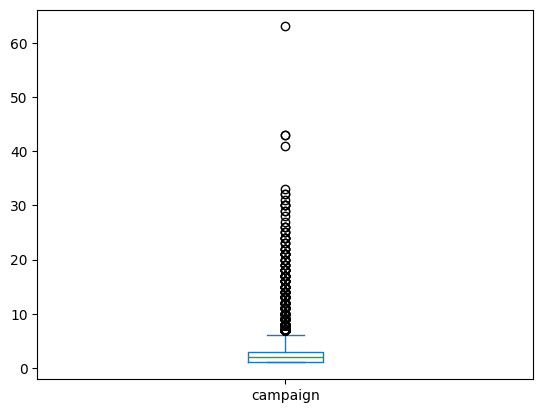

In [15]:
print(df_original['campaign'].describe())
df_original['campaign'].plot.box()

### Características campañas anteriores

##### Pdays

<Axes: >

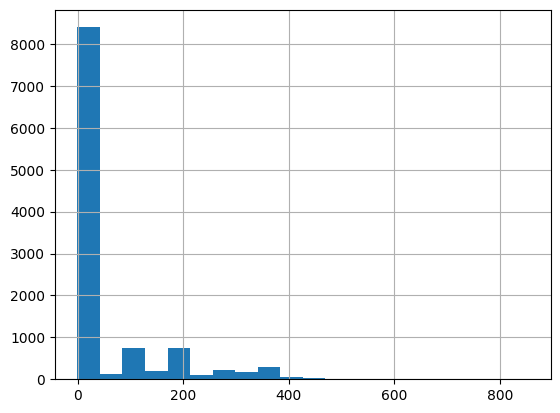

In [61]:
df_original['pdays'].hist(bins=20)

count    11163.000000
mean        51.325719
std        108.754538
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.500000
max        854.000000
Name: pdays, dtype: float64


(-3.0, 55.0)

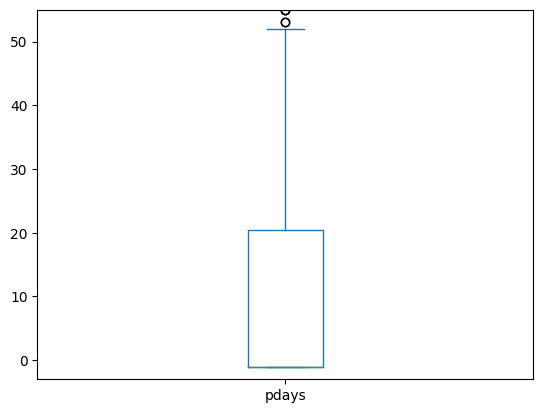

In [72]:
print(df_original['pdays'].describe())
df_original['pdays'].plot.box()
plt.ylim(-3, 55)

##### Previous

<Axes: >

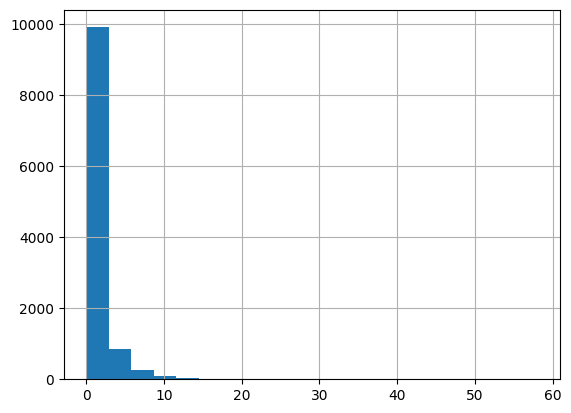

In [73]:
df_original['previous'].hist(bins=20)

count    11163.000000
mean         0.832482
std          2.291918
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64


(-1.0, 10.0)

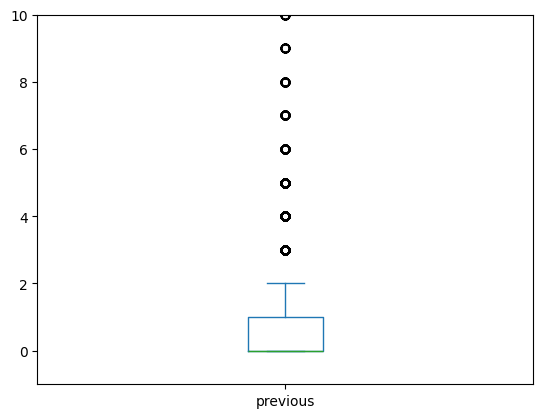

In [81]:
print(df_original['previous'].describe())
df_original['previous'].plot.box()
plt.ylim(-1, 10)

##### Poutcome

poutcome
unknown    8327
failure    1228
success    1071
other       537
Name: count, dtype: int64


<Axes: xlabel='poutcome'>

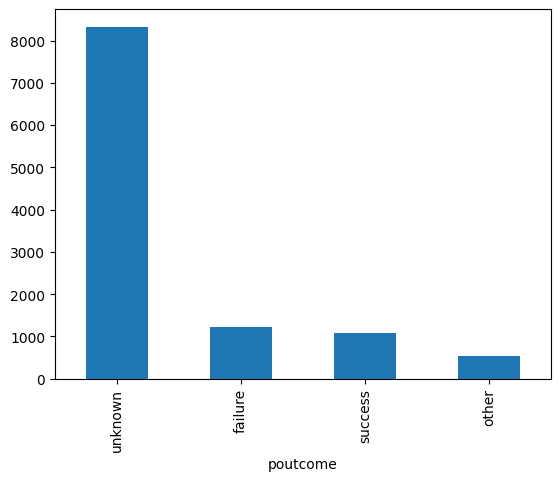

In [83]:
print(df_original['poutcome'].value_counts())
df_original['poutcome'].value_counts().plot(kind='bar', rot=90)

### Objetivo

##### Deposit

deposit
no     5873
yes    5290
Name: count, dtype: int64


<Axes: xlabel='deposit'>

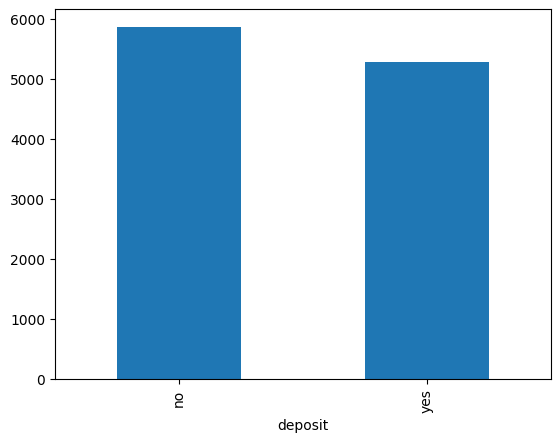

In [84]:
print(df_original['deposit'].value_counts())
df_original['deposit'].value_counts().plot(kind='bar', rot=90)

### Variables numéricas

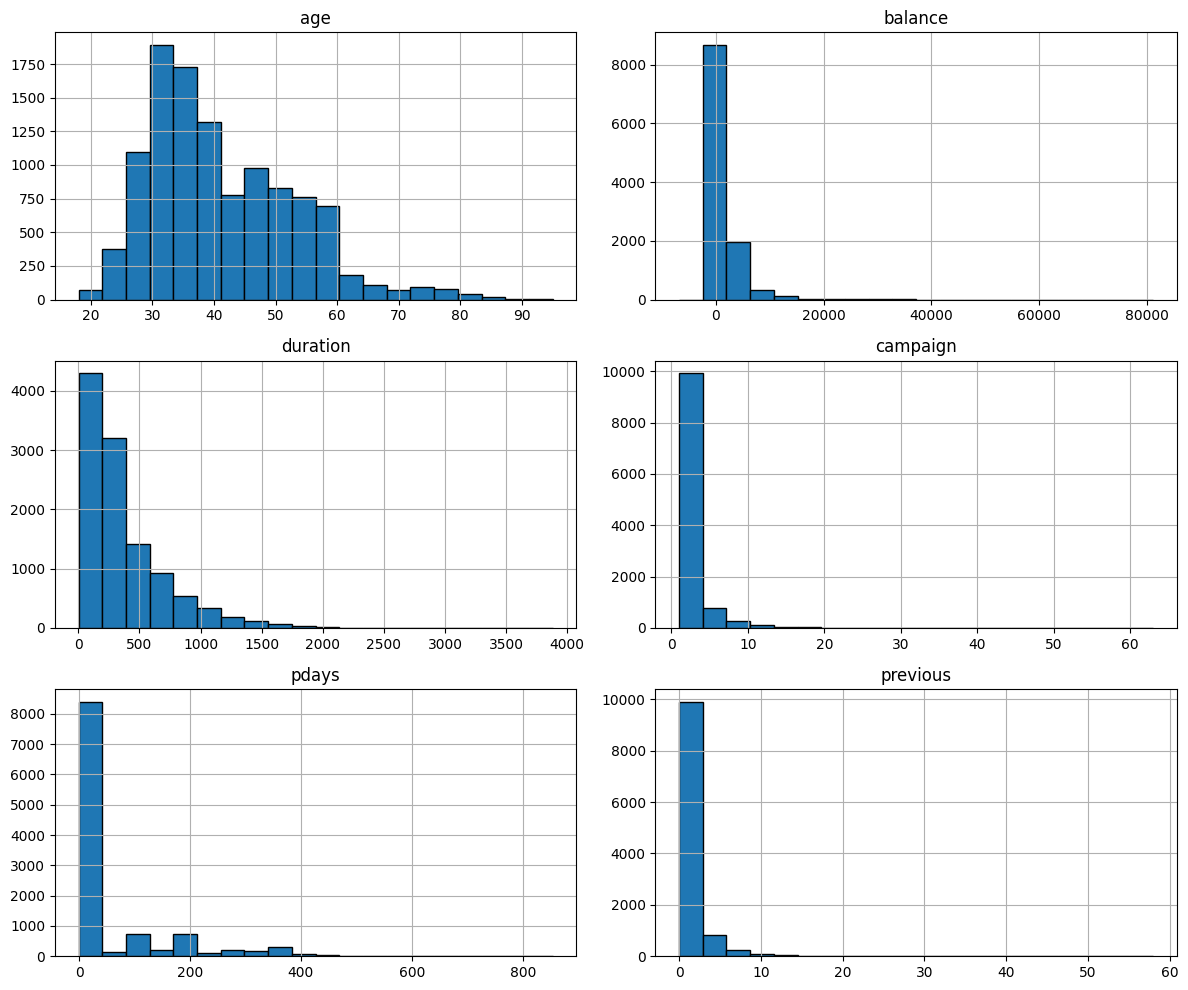

In [13]:
# Histogramas de todas las variables numéricas
numericas = df_original.select_dtypes(include='number').columns
numericas = numericas.drop(['id', 'day'])

df_original[numericas].hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.tight_layout()
plt.show()

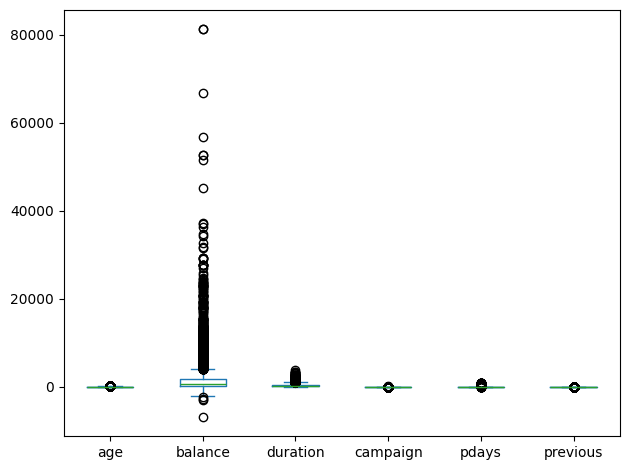

In [14]:
# Boxplots de variables numéricas
df_original[numericas].plot.box()
plt.tight_layout()
plt.show()

## 3. Análisis bivariado

#### Job

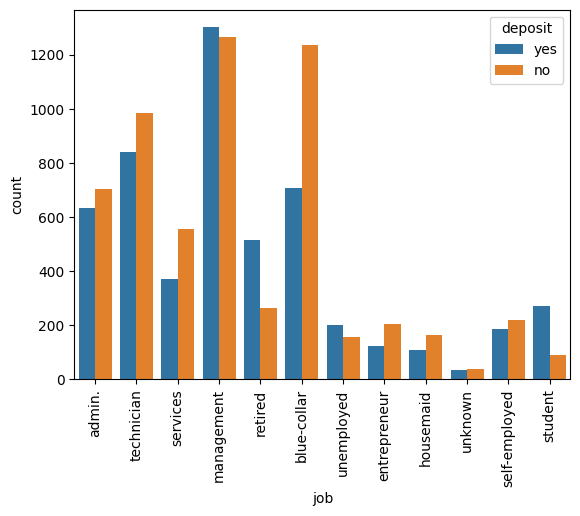

In [23]:
sns.countplot(data=df_original, x='job', hue='deposit')
plt.xticks(rotation=90)
plt.show()

#### Marital

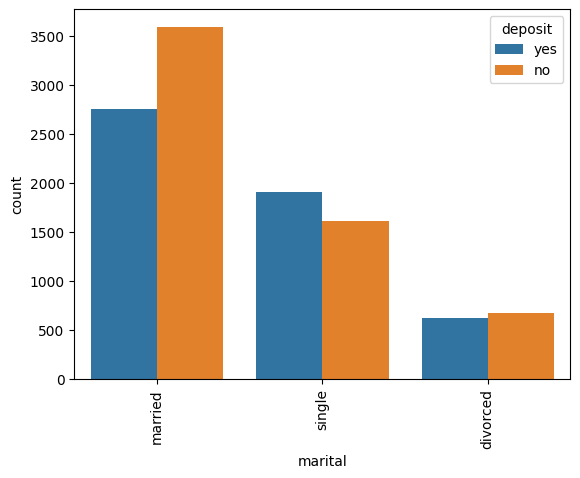

In [24]:
sns.countplot(data=df_original, x='marital', hue='deposit')
plt.xticks(rotation=90)
plt.show()

#### Education

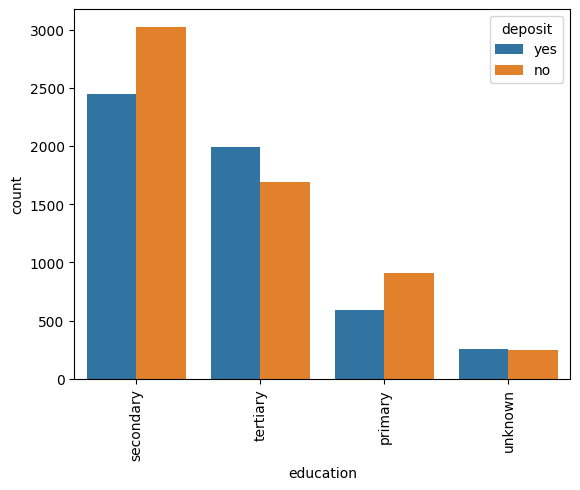

In [26]:
sns.countplot(data=df_original, x='education', hue='deposit')
plt.xticks(rotation=90)
plt.show()

#### Default (impagos)

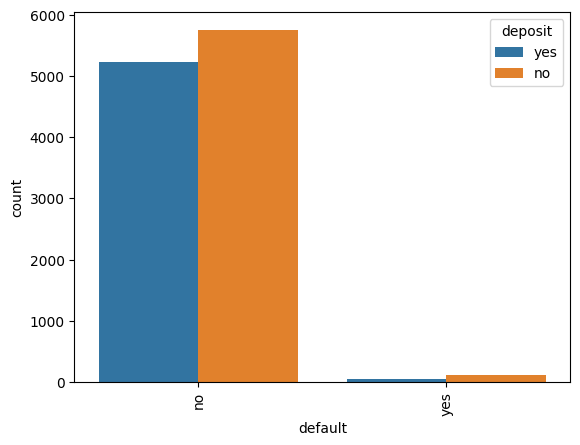

In [28]:
sns.countplot(data=df_original, x='default', hue='deposit')
plt.xticks(rotation=90)
plt.show()